In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Load Train Data
train_data = pd.read_csv('/content/train_data.txt', sep=':::', header=None, names=['SerialNumber', 'MOVIE_NAME', 'GENRE', 'MOVIE_PLOT'], engine='python')
X_train = train_data['MOVIE_PLOT'].astype(str).apply(lambda doc: doc.lower())
genre_labels = [genre.split(', ') for genre in train_data['GENRE']]
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(genre_labels)

In [3]:
train_data.columns

Index(['SerialNumber', 'MOVIE_NAME', 'GENRE', 'MOVIE_PLOT'], dtype='object')

In [4]:
# Print the list of unique genres
unique_genres = train_data['GENRE'].str.split(', ').explode().unique()
print("List of Unique Genres:")
for genre in unique_genres:
    print(genre)
len(unique_genres)

List of Unique Genres:
 drama 
 thriller 
 adult 
 documentary 
 comedy 
 crime 
 reality-tv 
 horror 
 sport 
 animation 
 action 
 fantasy 
 short 
 sci-fi 
 music 
 adventure 
 talk-show 
 western 
 family 
 mystery 
 history 
 news 
 biography 
 romance 
 game-show 
 musical 
 war 


27

<ipython-input-5-574432a046c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


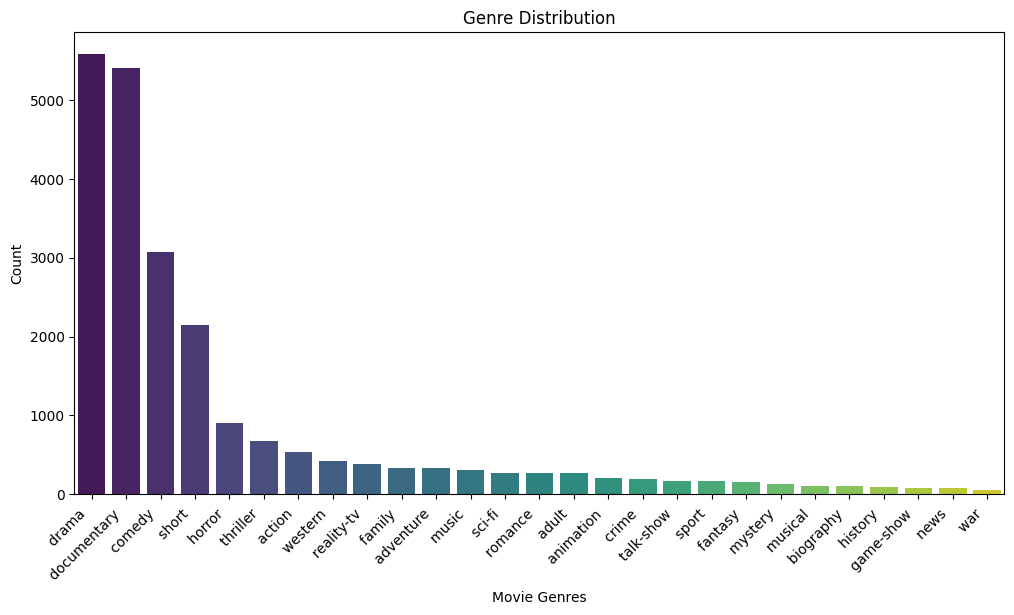

In [5]:
genre_counts = train_data['GENRE'].str.split(', ').explode().value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:

# Vectorize Training Data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [7]:
# Train Model
naive_bayes = MultinomialNB()
multi_output_classifier = MultiOutputClassifier(naive_bayes)
multi_output_classifier.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=MultinomialNB())

In [10]:
# Load Test Data
test_data = pd.read_csv('/content/train_data.txt', sep=':::', header=None, names=['SerialNumber', 'MOVIE_NAME', 'MOVIE_PLOT'], engine='python')
X_test = test_data['MOVIE_PLOT'].astype(str).apply(lambda doc: doc.lower())

In [11]:
# Vectorize Test Data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
# Predict on Test Data
y_pred = multi_output_classifier.predict(X_test_tfidf)

In [13]:
# Inverse Transform Predicted Genres
predicted_genres = mlb.inverse_transform(y_pred)
test_movie_names = test_data['MOVIE_NAME']

In [14]:
# Create DataFrame for Test Results
test_results = pd.DataFrame({'MOVIE_NAME': test_movie_names, 'PREDICTED_GENRES': predicted_genres})
test_results['PREDICTED_GENRES'] = test_results['PREDICTED_GENRES'].apply(lambda genres: ['Unknown'] if len(genres) == 0 else genres)
test_results['Serial_Number'] = test_data['SerialNumber']
test_results['MOVIE_PLOT'] = test_data['MOVIE_PLOT']

In [15]:
# Write Test Results to File
with open("test_data_solution.txt", "w", encoding="utf-8") as output_file:
    for _, row in test_results.iterrows():
        id = row['Serial_Number']
        movie_name = row['MOVIE_NAME']
        genre_str = ', '.join(row['PREDICTED_GENRES'])
        plot = row['MOVIE_PLOT']
        output_file.write(f"{id} ::: {movie_name} ::: {genre_str} ::: {plot}\n")

In [16]:
# Evaluate Model on Training Data
y_train_pred = multi_output_classifier.predict(X_train_tfidf)
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='micro')
recall = recall_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

In [17]:
# Print Model Evaluation Metrics
print("\n\nModel Evaluation Metrics:\n")
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print(f"Precision: {precision:.2f}\n")
print(f"Recall: {recall:.2f}\n")
print(f"F1-score: {f1:.2f}\n")



Model Evaluation Metrics:

Accuracy: 26.10%

Precision: 0.75

Recall: 0.26

F1-score: 0.39

